# Background

Twitter is a micro-blogging social media platform with 217.5 million daily active users globally. With 500 million new tweets (posts) daily, the topics of these tweets varies widely – k-pop, politics, financial news… you name it! Individuals use it for news, entertainment, and discussions, while corporations use them to as a marketing tool to reach out to a wide audience. Given the freedom Twitter accords to its user, Twitter can provide a conducive environment for productive discourse, but this freedom can also be abused, manifesting in the forms of racism and sexism.

# Problem Statement

With Twitter’s significant income stream coming from advertisers, it is imperative that Twitter keeps a substantial user base. On the other hand, Twitter should maintain a safe space for users and provide some level of checks for the tweets the users put out into the public space, and the first step would be to identify tweets that espouse racist or sexist ideologies, and then Twitter can direct the users to appropriate sources of information where users can learn more about the community that they offend or their subconscious biases so they will be more aware of their racist/sexist tendencies. Thus, to balance, Twitter has to be accurate in filtering inappropriate tweets from innocuous ones, and the kind of inappropriateness of flagged tweets (tag - racist or sexist).

F1-scores will be the primary metric as it looks at both precision and recall, each looking at false positives (FPs) and false negatives (FNs) respectively, and is a popular metric for imbalanced data as is the case with the dataset used.

For the purpose of explanation, racist tweets are used as the ‘positive’ case.

In this context, FPs are the cases where the model erroneously flags out tweets as racist when the tweet is actually innocuous/sexist. FNs are cases where the model erroneously flags out tweets as innocuous/sexist but the tweets are actually racist.

Thus, higher F1-scores are preferred.

# Importing Libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For NLP data cleaning and preprocessing
import re, string, nltk, itertools
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Changing display settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', None)

# Importing Dataset

In [3]:
twitter_final2 = pd.read_csv('../Capstone/data/twitter_final2.csv')

In [4]:
twitter_final2.head()

,Text,Annotation,oh_label,Text_stem,Text_lemm
0,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj,none,0,read contextno chang mean histori islam slaveri,read contextno change meaning history islamic slavery
1,@ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist made him a terrorist. Islamically brain dead.,none,0,idiot claim peopl tri stop becom terrorist made terrorist islam brain dead,idiot claim people try stop become terrorist make terrorist islamically brain dead
2,"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy",sexism,1,call sexist go auto place would rather talk guy,call sexist go auto place would rather talk guy
3,"@g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.",racism,1,wrong isi follow exampl moham quran exactli,wrong isi follow example mohammed quran exactly
4,#mkr No No No No No No,none,0,mkr,mkr


# Preprocessing of Character n-grams

### Creating Function to create character n-grams

In [5]:
def creating_char_n_gram(text, n):
    result = []
    text = str(text).split()
    for word in text:
        result.append([word[i: i + n] for i in range(len(word) - n + 1)])
    result = list(itertools.chain.from_iterable(result))
    return result

In [6]:
# Results of previous function is a list of lists containing character n-grams, need to unwrap the inner lists
def unwrapping_lists_of_char_n_grams(text):
    for i in range(len(text)):
        return ' '.join(text)

### Creating Columns of Character n-gram 

### Based on stemmed text

In [7]:
# Creating character n-gram columns and unwrapping the lists of individual character n-grams
# Character 2-gram
twitter_final2['Text_stem_char_2_gram'] = twitter_final2['Text_stem'].apply(lambda text: creating_char_n_gram(text,2))
twitter_final2['Text_stem_char_2_gram'] = twitter_final2['Text_stem_char_2_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

# Character 3-gram
twitter_final2['Text_stem_char_3_gram'] = twitter_final2['Text_stem'].apply(lambda text: creating_char_n_gram(text,3))
twitter_final2['Text_stem_char_3_gram'] = twitter_final2['Text_stem_char_3_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

# Character 4-gram
twitter_final2['Text_stem_char_4_gram'] = twitter_final2['Text_stem'].apply(lambda text: creating_char_n_gram(text,4))
twitter_final2['Text_stem_char_4_gram'] = twitter_final2['Text_stem_char_4_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

### Based on lemmatized text

In [8]:
# Creating character n-gram columns and unwrapping the lists of individual character n-grams
# Character 2-gram
twitter_final2['Text_lemm_char_2_gram'] = twitter_final2['Text_lemm'].apply(lambda text: creating_char_n_gram(text,2))
twitter_final2['Text_lemm_char_2_gram'] = twitter_final2['Text_lemm_char_2_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

# Character 3-gram
twitter_final2['Text_lemm_char_3_gram'] = twitter_final2['Text_lemm'].apply(lambda text: creating_char_n_gram(text,3))
twitter_final2['Text_lemm_char_3_gram'] = twitter_final2['Text_lemm_char_3_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

# Character 4-gram
twitter_final2['Text_lemm_char_4_gram'] = twitter_final2['Text_lemm'].apply(lambda text: creating_char_n_gram(text,4))
twitter_final2['Text_lemm_char_4_gram'] = twitter_final2['Text_lemm_char_4_gram'].apply(lambda text: unwrapping_lists_of_char_n_grams(text))

In [9]:
twitter_final2.head()

,Text,Annotation,oh_label,Text_stem,Text_lemm,Text_stem_char_2_gram,Text_stem_char_3_gram,Text_stem_char_4_gram,Text_lemm_char_2_gram,Text_lemm_char_3_gram,Text_lemm_char_4_gram
0,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj,none,0,read contextno chang mean histori islam slaveri,read contextno change meaning history islamic slavery,re ea ad co on nt te ex xt tn no ch ha an ng me ea an hi is st to or ri is sl la am sl la av ve er ri,rea ead con ont nte tex ext xtn tno cha han ang mea ean his ist sto tor ori isl sla lam sla lav ave ver eri,read cont onte ntex text extn xtno chan hang mean hist isto stor tori isla slam slav lave aver veri,re ea ad co on nt te ex xt tn no ch ha an ng ge me ea an ni in ng hi is st to or ry is sl la am mi ic sl la av ve er ry,rea ead con ont nte tex ext xtn tno cha han ang nge mea ean ani nin ing his ist sto tor ory isl sla lam ami mic sla lav ave ver ery,read cont onte ntex text extn xtno chan hang ange mean eani anin ning hist isto stor tory isla slam lami amic slav lave aver very
1,@ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist made him a terrorist. Islamically brain dead.,none,0,idiot claim peopl tri stop becom terrorist made terrorist islam brain dead,idiot claim people try stop become terrorist make terrorist islamically brain dead,id di io ot cl la ai im pe eo op pl tr ri st to op be ec co om te er rr ro or ri is st ma ad de te er rr ro or ri is st is sl la am br ra ai in de ea ad,idi dio iot cla lai aim peo eop opl tri sto top bec eco com ter err rro ror ori ris ist mad ade ter err rro ror ori ris ist isl sla lam bra rai ain dea ead,idio diot clai laim peop eopl stop beco ecom terr erro rror rori oris rist made terr erro rror rori oris rist isla slam brai rain dead,id di io ot cl la ai im pe eo op pl le tr ry st to op be ec co om me te er rr ro or ri is st ma ak ke te er rr ro or ri is st is sl la am mi ic ca al ll ly br ra ai in de ea ad,idi dio iot cla lai aim peo eop opl ple try sto top bec eco com ome ter err rro ror ori ris ist mak ake ter err rro ror ori ris ist isl sla lam ami mic ica cal all lly bra rai ain dea ead,idio diot clai laim peop eopl ople stop beco ecom come terr erro rror rori oris rist make terr erro rror rori oris rist isla slam lami amic mica ical call ally brai rain dead
2,"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy",sexism,1,call sexist go auto place would rather talk guy,call sexist go auto place would rather talk guy,ca al ll se ex xi is st go au ut to pl la ac ce wo ou ul ld ra at th he er ta al lk gu uy,cal all sex exi xis ist aut uto pla lac ace wou oul uld rat ath the her tal alk guy,call sexi exis xist auto plac lace woul ould rath athe ther talk,ca al ll se ex xi is st go au ut to pl la ac ce wo ou ul ld ra at th he er ta al lk gu uy,cal all sex exi xis ist aut uto pla lac ace wou oul uld rat ath the her tal alk guy,call sexi exis xist auto plac lace woul ould rath athe ther talk
3,"@g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.",racism,1,wrong isi follow exampl moham quran exactli,wrong isi follow example mohammed quran exactly,wr ro on ng is si fo ol ll lo ow ex xa am mp pl mo oh ha am qu ur ra an ex xa ac ct tl li,wro ron ong isi fol oll llo low exa xam amp mpl moh oha ham qur ura ran exa xac act ctl tli,wron rong foll ollo llow exam xamp ampl moha oham qura uran exac xact actl ctli,wr ro on ng is si fo ol ll lo ow ex xa am mp pl le mo oh ha am mm me ed qu ur ra an ex xa ac ct tl ly,wro ron ong isi fol oll llo low exa xam amp mpl ple moh oha ham amm mme med qur ura ran exa xac act ctl tly,wron rong foll ollo llow exam xamp ampl mple moha oham hamm amme mmed qura uran exac xact actl ctly
4,#mkr No No No No No No,none,0,mkr,mkr,mk kr,mkr,None,mk kr,mkr,None


It can be observed that some texts rows contain None because the cleaned texts do not have enough characters to make the character n-grams. Need to remove those rows before transforming the columns into bag of words.

In [10]:
twitter_final2.Text_stem_char_2_gram.isna().sum()

11

In [11]:
twitter_final2.Text_stem_char_3_gram.isna().sum()

56

In [12]:
twitter_final2.Text_stem_char_4_gram.isna().sum()

229

In [13]:
twitter_final2.Text_lemm_char_2_gram.isna().sum()

13

In [14]:
twitter_final2.Text_lemm_char_3_gram.isna().sum()

36

In [15]:
twitter_final2.Text_lemm_char_4_gram.isna().sum()

239

# Dropping rows with None values

In [16]:
twitter_final2.shape

(16542, 11)

In [17]:
twitter_final2 = twitter_final2.dropna(subset = ['Text_stem_char_2_gram','Text_stem_char_3_gram','Text_stem_char_4_gram'])
twitter_final2 = twitter_final2.dropna(subset = ['Text_lemm_char_2_gram','Text_lemm_char_3_gram','Text_lemm_char_4_gram'])

In [18]:
# Checking
twitter_final2.Text_stem_char_2_gram.isna().sum()

0

In [19]:
# Checking
twitter_final2.Text_stem_char_3_gram.isna().sum()

0

In [20]:
# Checking
twitter_final2.Text_stem_char_4_gram.isna().sum()

0

In [21]:
twitter_final2.shape

(16299, 11)

Since each of the character n-gram are already created, and are separated by a whitespace, a CountVectorizer with the default argument of ngram_range = (1, 1) can be used.

In [22]:
# Instantiating CountVectorizer
cv1 = CountVectorizer()

In [23]:
# Character Bigram for lemmaztized text
cv1.fit(twitter_final2['Text_lemm_char_2_gram'])

lemm_char_bigram_cv1_racism = cv1.transform(twitter_final2['Text_lemm_char_2_gram'][twitter_final2['Annotation'] == 'racism'])
lemm_char_bigram_cv1_sexism = cv1.transform(twitter_final2['Text_lemm_char_2_gram'][twitter_final2['Annotation'] == 'sexism'])
lemm_char_bigram_cv1_racism_df = pd.DataFrame(lemm_char_bigram_cv1_racism.todense(), columns=cv1.get_feature_names_out())
lemm_char_bigram_cv1_sexism_df = pd.DataFrame(lemm_char_bigram_cv1_sexism.todense(), columns=cv1.get_feature_names_out())

In [24]:
# Character Trigram for lemmaztized text
cv1.fit(twitter_final2['Text_lemm_char_3_gram'])

lemm_char_trigram_cv1_racism = cv1.transform(twitter_final2['Text_lemm_char_3_gram'][twitter_final2['Annotation'] == 'racism'])
lemm_char_trigram_cv1_sexism = cv1.transform(twitter_final2['Text_lemm_char_3_gram'][twitter_final2['Annotation'] == 'sexism'])
lemm_char_trigram_cv1_racism_df = pd.DataFrame(lemm_char_trigram_cv1_racism.todense(), columns=cv1.get_feature_names_out())
lemm_char_trigram_cv1_sexism_df = pd.DataFrame(lemm_char_trigram_cv1_sexism.todense(), columns=cv1.get_feature_names_out())

In [25]:
# Character 4-gram for lemmaztized text
cv1.fit(twitter_final2['Text_lemm_char_4_gram'])

lemm_char_4gram_cv1_racism = cv1.transform(twitter_final2['Text_lemm_char_4_gram'][twitter_final2['Annotation'] == 'racism'])
lemm_char_4gram_cv1_sexism = cv1.transform(twitter_final2['Text_lemm_char_4_gram'][twitter_final2['Annotation'] == 'sexism'])
lemm_char_4gram_cv1_racism_df = pd.DataFrame(lemm_char_4gram_cv1_racism.todense(), columns=cv1.get_feature_names_out())
lemm_char_4gram_cv1_sexism_df = pd.DataFrame(lemm_char_4gram_cv1_sexism.todense(), columns=cv1.get_feature_names_out())

# Character n-gram Analysis

For the purpose of plotting commonly observed character n-grams without significant overlaps, the following will only plot lemmatized texts.

### Bigram

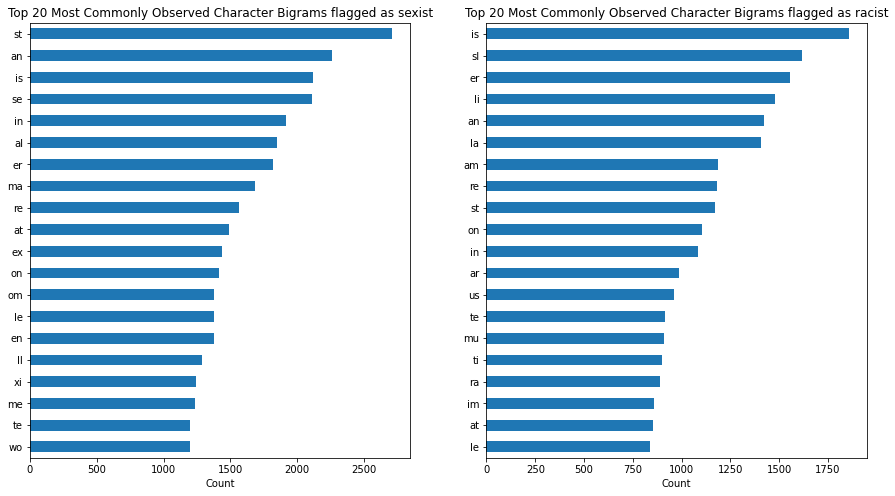

In [26]:
# Plotting the top 20 character bigram of lemmatized texts
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (15,8))
ax = ax.ravel()

plt.subplots_adjust(hspace = 0.1)

# Setting up plot for sexism
lemm_char_bigram_cv1_sexism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[0])
ax[0].set_title('Top 20 Most Commonly Observed Character Bigrams flagged as sexist')
ax[0].set_xlabel('Count')

# Setting up plot for racism
lemm_char_bigram_cv1_racism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[1])
ax[1].set_title('Top 20 Most Commonly Observed Character Bigrams flagged as racist')
ax[1].set_xlabel('Count');

Unlike the case of word bigram, character bigrams do not offer much information on the frequently observed terms, which is not a large concern since lower levels of character n-grams are just 2 letters whose primary objective is showing the 2 common consecutive letters of words from those flagged tweets.

### Trigram

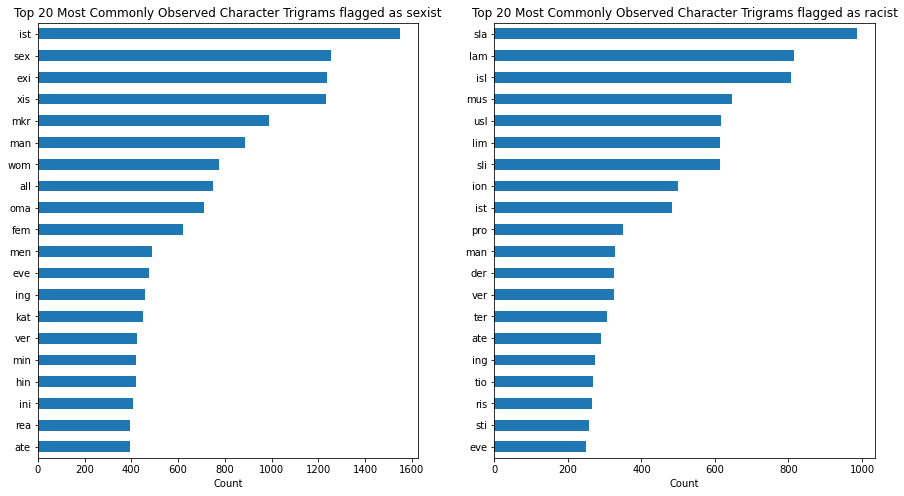

In [27]:
# Plotting the top 20 character trigram of lemmatized texts
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (15,8))
ax = ax.ravel()

plt.subplots_adjust(hspace = 0.1)

# Setting up plot for sexism
lemm_char_trigram_cv1_sexism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[0])
ax[0].set_title('Top 20 Most Commonly Observed Character Trigrams flagged as sexist')
ax[0].set_xlabel('Count')

# Setting up plot for racism
lemm_char_trigram_cv1_racism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[1])
ax[1].set_title('Top 20 Most Commonly Observed Character Trigrams flagged as racist')
ax[1].set_xlabel('Count');

For character trigrams from tweets flagged as sexist, there are notable terms that are also highlighted from character trigrams such as 'mkr', 'kat', and parts of the words 'sexist', 'sexism', and 'woman'.

For character trigrams from tweets flagged as racist, parts of the word 'islam' and 'muslim' are apparent.

### 4-gram

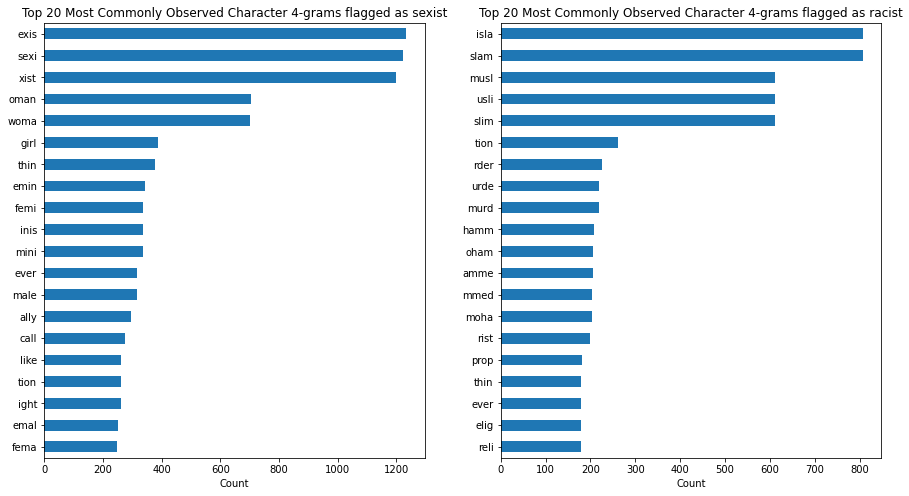

In [28]:
# Plotting the top 20 character 4-gram of lemmatized texts
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (15,8))
ax = ax.ravel()

plt.subplots_adjust(hspace = 0.1)

# Setting up plot for sexism
lemm_char_4gram_cv1_sexism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[0])
ax[0].set_title('Top 20 Most Commonly Observed Character 4-grams flagged as sexist')
ax[0].set_xlabel('Count')

# Setting up plot for racism
lemm_char_4gram_cv1_racism_df.sum().sort_values(ascending=True).tail(20).plot(kind='barh',ax = ax[1])
ax[1].set_title('Top 20 Most Commonly Observed Character 4-grams flagged as racist')
ax[1].set_xlabel('Count');

For character 4-grams from tweets flagged as sexist, there is not much additional information gathered other than the mention of the word 'feminism'.

For character trigrams from tweets flagged as racist, as compared to the character trigrams, notable parts of the name 'Prophet Mohammed' can be observed.

# Exporting Dataset

In [29]:
twitter_final2.to_csv('../Capstone/data/twitter_final3.csv', index = False)